## Cournot Duopoly

Consider two firms competing to maximize their profits by choosing a quantity, $q_i$ to produce for $i = 1, 2$.  Assume the firms have identical costs of production $C_i(q_i) = c q_i$ where $c > 0$.  The two firms face market inverse demand function,

\begin{align}
    p(Q) &= a - b Q \\
    &= a - b(q_1 + q_2)
\end{align}

Each firm must simultaneously choose a strategy $q_i \in [0, \infty)$ given a production choice of their competitor, $q_j$ to maximize their private profits.  The payoff to any choice of firm $i$ is,

\begin{align}
    \pi(q_i | q_j) &= (a - bq_i - bq_j)q_i - cq_i 
\end{align}

In [2]:
from sympy import *
from sympy.plotting import plot
init_printing()

In [3]:
# Set up the parameters and functions
# for our optimization problem.
a, b, c, q1, q2 = symbols('a b c q_1 q_2',
                          real=True,
                          positive=True,
                          finite=True)

price = a - b * (q1 + q2)
profit1 = price * q1 - c * q1
profit2 = price * q2 - c * q2

For the firms to choose a quantity to maximize their profits given the choice of their competitor, each firm will have to find a $q$ that satisfies both a first and second order condition.  Before we start taking derivatives lets check a few properties of the first and second derivatives.

In [4]:
# Take the first and second derivative of either
# profit1 or profit2.
test_deriv2 = profit1.diff(q1).diff(q1)

# What can we tell about the signs of these
# derivatives?
test_deriv2.is_negative

True

So we see that the second derivative of either firm's payoff function is negative, for all $q \in [0, \infty)$.  This means that the function is globally concave in $q$ and the first order condition is both **necessary** and **sufficient** for a maximum.  In other words, the only critical points are maxima.  So if we find one, then we are good to go.

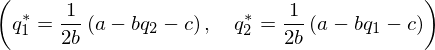

In [5]:
# Take the derivatives
Dprofit1 = profit1.diff(q1)
Dprofit2 = profit2.diff(q2)

# Set the derivatives equal to
# zero and solve for the firm's
# quantity to get their best
# response function.
BR1 = solve(Dprofit1, q1)[0]
BR2 = solve(Dprofit2, q2)[0]

Eq(Symbol('q_1^*'), BR1), Eq(Symbol('q_2^*'), BR2)

Lets momentarily assume some parameter values and graphically depict these best response functions.  We will assume the following values:

| Parameter | Value |
| :---: | :---: |
| $a$ | 20 |
| $b$ | 1.5 |
| $c$ | 1 |

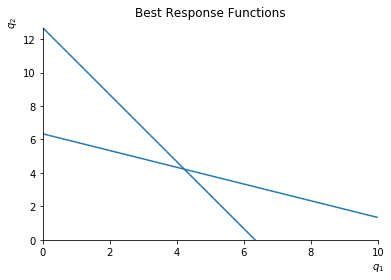

In [24]:
# Define generic 'q' symbol
q = Symbol('q')

# Invert q1 BR
BR1_invert = solve(q1 - BR1, q2)[0]

vals = {a: 20,
        b: 1.5,
        c: 1,
        q1: q,
        q2: q}

p1 = plot(BR1_invert.subs(vals),
          BR2.subs(vals),
          (q, 0, 10),
          title="Best Response Functions",
          xlabel="$q_1$",
          ylabel="$q_2$",
          ylim=(0,13))
p1

## Nash Equilibrium

Great! So we found the profit maximizing strategy for each firm and have characterized all possible optimal strategies by the firm's best response function.  We can substitute these into each other to obtain the **Nash Equilibrium** values.

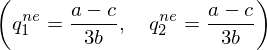

In [25]:
# Substitute firm 1's optimal response into
# firm 2's optimal response.
equil_vals_2 = BR2.subs(q1, BR1)

# Now collect q2 on both sides and solve
# for q2 in terms of parameters.
q2_ne = solve(q2 - equil_vals_2, q2)[0]

# Now substitute the Nash equilibrium
# value of q2 into the best response
# of firm 1.
equil_vals_1 = BR1.subs(q2, q2_ne)

# Now collect q1 on both sides and solve
# for q1 in terms of parameters.
q1_ne = solve(q1 - equil_vals_1, q1)[0]

# Display the values
Eq(Symbol('q_1^{ne}'), q1_ne), Eq(Symbol('q_2^{ne}'), q2_ne)

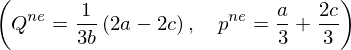

In [33]:
# Equilibrium Output
Q_ne = simplify(q1_ne + q2_ne)
P_ne = simplify(price.subs({q1: q1_ne, q2: q2_ne}))

Eq(Symbol('Q^{ne}'), Q_ne), Eq(Symbol('p^{ne}'), P_ne)